Import necessary modules needed for cleaning and visualising the data. Also read in the datasets needed for this question.

In [2]:
#Read in necessary modules
import pandas as pd
import matplotlib.pyplot as plt
#Import Seattle Air BnB Listings data.
seattle_df_listings = pd.read_csv('/Users/Sean.Kelly/Dropbox/My Mac (MACBOOK049)/Downloads/archive (1)/seattle_listings.csv')


In [4]:
#Get a view of the columns we are working with in the Seattle listings dataframe.
seattle_df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   float64
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Looking at these columns, we will select a few that could be useful in determining differences between superhosts and non superhosts. First, we will look at data on reviews to see if superhosts acheive better reviews on their Air BnB than non superhosts do.

In [5]:
#Create a new review df including whether or not the host is a superhost as well as data on reviews.
reviews = seattle_df_listings[['host_is_superhost','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location']]
reviews




,host_is_superhost,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
0,f,207,95.0,10.0,10.0,10.0,10.0,9.0
1,t,43,96.0,10.0,10.0,10.0,10.0,10.0
2,f,20,97.0,10.0,10.0,10.0,10.0,10.0
3,f,0,NaN,NaN,NaN,NaN,NaN,NaN
4,f,38,92.0,9.0,9.0,10.0,10.0,9.0
...,...,...,...,...,...,...,...,...
3813,f,1,80.0,8.0,10.0,4.0,8.0,10.0
3814,f,2,100.0,10.0,10.0,10.0,10.0,10.0
3815,f,0,NaN,NaN,NaN,NaN,NaN,NaN
3816,f,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Change the values in the host_is_superhost column to make it more clear. f = not a superhost. t = superhost.
reviews['host_is_superhost']= reviews['host_is_superhost'].replace({'f':'Non Superhost', 't':'Superhost'})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We can see in the chart below that most of the Air BnB hosts in Seattle are not superhosts. Around 80% not superhosts.

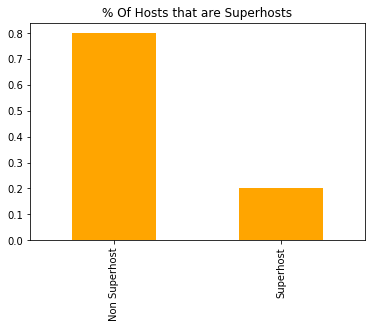

In [7]:
#Plot superhost v non superhost count.
round(reviews['host_is_superhost'].value_counts()/len(reviews),2).plot(kind = 'bar', color = 'orange', title = '% Of Hosts that are Superhosts')

Next, we have grouped the data by their superhost status, so we can start to compare differences.

In [11]:
#groupby function to aggregate data by superhost status
comparison = reviews.groupby('host_is_superhost', axis = 0).mean()
comparison

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
host_is_superhost,,,,,,,
Non Superhost,17.235681,93.652893,9.552511,9.454018,9.731424,9.758278,9.564677
Superhost,41.757069,97.395473,9.905459,9.885486,9.964048,9.974700,9.750999


In the annotated plot below, we can see get a view of the contrast between varying review metrics depending on whether you are a superhost or not. The review scores of Superhosts rank higher in every department, I guess this is why there are superhosts!

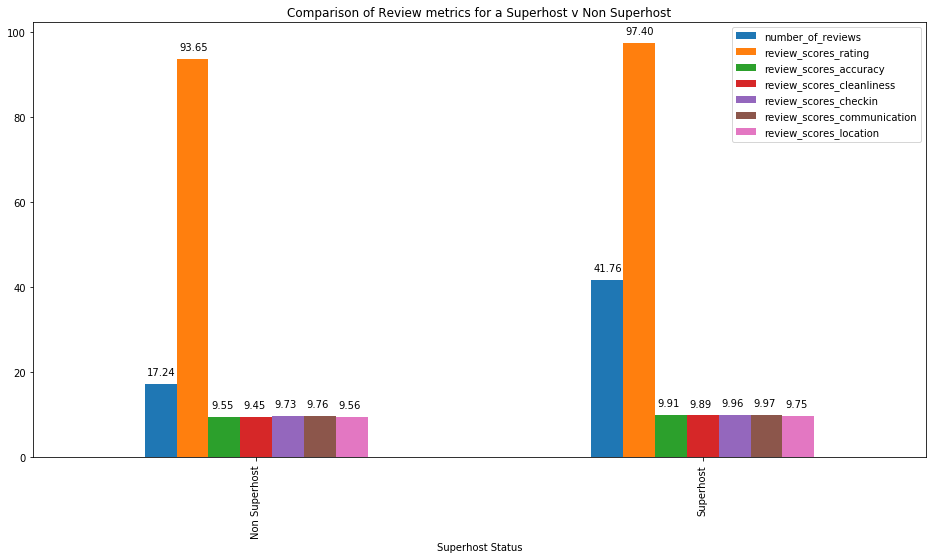

In [15]:
#Plot the differnces between all the review data against superhost status.
ax = comparison.plot(kind = 'bar', figsize = (16,8), title = 'Comparison of Review metrics for a Superhost v Non Superhost')
ax.set_xlabel('Superhost Status')

x_offset = -0.03
y_offset = 2
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

Next, we will look into whether superhosts are better at responding to customers than non superhosts.

In [17]:
#New df for data on responses, including superhost status
response = seattle_df_listings[['host_is_superhost','host_response_time','host_response_rate']]

In [18]:
#Get rid of all null data.
response = response.dropna()

We can see data below on the superhost status, as well as how quickly they usually respond and how often they respond to their customers.

In [21]:
response

,host_is_superhost,host_response_time,host_response_rate
0,f,within a few hours,96%
1,t,within an hour,98%
2,f,within a few hours,67%
4,f,within an hour,100%
6,t,within an hour,100%
...,...,...,...
3812,t,within an hour,100%
3813,f,within a few hours,99%
3814,f,within an hour,100%
3816,f,within an hour,100%


In [22]:
#Change the values in the host_is_superhost column to make it more clear. f = not a superhost. t = superhost.
response['host_is_superhost']= response['host_is_superhost'].replace({'f':'Non Superhost', 't':'Superhost'})

In [24]:
#Check datatypes, all columns objects. response rate ideally should be a numerical value.
response.dtypes

host_is_superhost     object
host_response_time    object
host_response_rate    object
dtype: object

In [25]:
#Get rid of the % symbol in the host_response_rate column and make it numeric.
response['host_response_rate'] = response['host_response_rate'].str.replace('%', '')
response['host_response_rate'] = pd.to_numeric(response['host_response_rate'],errors='coerce')


In [27]:
#Split data between response rate and response time.
response_rate = response[['host_is_superhost','host_response_rate']]
response_time = response[['host_is_superhost','host_response_time']]

Next, aggregate the data by their superhost status, and compare the response rates between the status.

In [28]:
comparison2 = pd.pivot_table(data = response_rate, index = 'host_is_superhost', values = 'host_response_rate') 

Again, in the chart below, we can see that superhosts respond to their customers more often than non superhosts do. 

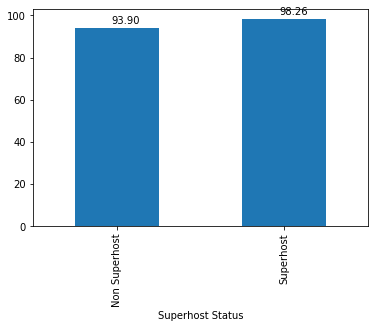

In [30]:
#Plot the comparison chart.
ax = comparison2.plot(kind = 'bar')
ax.get_legend().remove()
ax.set_xlabel('Superhost Status')
x_offset = -0.03
y_offset = 2
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

Now, lets look at the response times of superhosts v non superhosts.

In [31]:
#Get a view of the data
response_time.head(5)

,host_is_superhost,host_response_time
0,Non Superhost,within a few hours
1,Superhost,within an hour
2,Non Superhost,within a few hours
4,Non Superhost,within an hour
6,Superhost,within an hour


In [32]:
#Split the data between superhosts and non superhosts
response_time_superhost = response_time[response_time['host_is_superhost'] == 'Superhost']
response_time_non_superhost = response_time[response_time['host_is_superhost'] == 'Non Superhost']

In [34]:
#Make a new df on the non superhost response times as a %
non_superhost = pd.DataFrame(data = response_time_non_superhost['host_response_time'].value_counts()/len(response_time_non_superhost))
#Rename the columns in the new df
non_superhost = non_superhost.rename(columns = {'host_response_time': 'Non Superhost Response Times (%)'})
#Round the numbers in the df so its more visually pleasing in the table
non_superhost['Non Superhost Response Times (%)'] = round(non_superhost['Non Superhost Response Times (%)']*100,1)


#Make a new df on the superhost response times as a %
superhost = pd.DataFrame(data = response_time_superhost['host_response_time'].value_counts()/len(response_time_superhost))
#Rename the columns in the new df
superhost = superhost.rename(columns = {'host_response_time': 'Superhost Response Times (%)'})
#Round the numbers in the df so its more visually pleasing in the table
superhost['Superhost Response Times (%)'] = round(superhost['Superhost Response Times (%)']*100,1)


In the table below, it gives us a comparison of how long it takes Air Bnb hosts to respond based on superhost status. Clearly, we can see that superhosts are much mor effective at responding to their customers.

In [39]:
#combine this data
frames = [non_superhost,superhost]
#Plot the comparison table
result = pd.concat([superhost, non_superhost], axis=1)
result.rename(columns = {})

,Superhost Response Times (%),Non Superhost Response Times (%)
within an hour,65.6,47.2
within a few hours,26.6,30.2
within a day,7.7,21.2
a few days or more,0.1,1.5


Finally, we will look at the difference in price by superhost status. We will compare price by number of bedrooms.

In [5]:
#Gather columns we need for analysis. 
price_comparison = seattle_df_listings[['bedrooms','host_is_superhost','price']]

In [7]:
#Get a view of this data.
price_comparison

,bedrooms,host_is_superhost,price
0,1.0,f,$85.00
1,1.0,t,$150.00
2,5.0,f,$975.00
3,0.0,f,$100.00
4,3.0,f,$450.00
...,...,...,...
3813,3.0,f,$359.00
3814,1.0,f,$79.00
3815,1.0,f,$93.00
3816,0.0,f,$99.00


Let's convert price to a numeric through the function.

In [8]:
def func(col):
    
    '''
    INPUT
    col - column from pandas dataframe 
    
    OUTPUT
    col - cleaned column from pandas dataframe
    
    This function cleans df using the following steps:
    1. Removes the first digit at the beginning of the column
    2. Converts the column to numeric
    '''
     
    col = col.str[1:]
    col = pd.to_numeric(col,errors='coerce')
    return col
price_comparison['price'] = price_comparison[['price']].apply(func)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
#Rename the column name 'host_is_superhost' to 'Superhost Status' and 'price' to 'Price ($)' in the new df
price_comparison = price_comparison.rename(columns = {'host_is_superhost': 'Superhost Status', 'price':'Price ($)'})
#Change the values in the host_is_superhost column to make it more clear. f = not a superhost. t = superhost.
price_comparison['Superhost Status']= price_comparison['Superhost Status'].replace({'f':'Non Superhost', 't':'Superhost'})
#Round this data by 2.
price_comparison['Price ($)'] = round(price_comparison['Price ($)'],2)

Next, we will groupby the number or bedrooms and superhost status, and get the mean price of each. This will allow us to see any differences in price between superhosts and non superhosts by no. of bedrooms.

In [12]:
p = price_comparison.groupby(['bedrooms','Superhost Status'],axis =0).mean()
p['Price ($)'] = round(p['Price ($)'],1)
p

Price ($)
bedrooms Superhost Status           
0.0      Non Superhost         101.9
         Superhost             109.8
1.0      Non Superhost          94.3
         Superhost             100.4
2.0      Non Superhost         168.9
         Superhost             190.5
3.0      Non Superhost         248.9
         Superhost             252.7
4.0      Non Superhost         318.6
         Superhost             287.6
5.0      Non Superhost         473.1
         Superhost             376.9
6.0      Non Superhost         557.2
         Superhost             620.0
7.0      Non Superhost         375.0

The plot below shows there is a not a massive difference in the price per night of an air bnb based on superhost status.

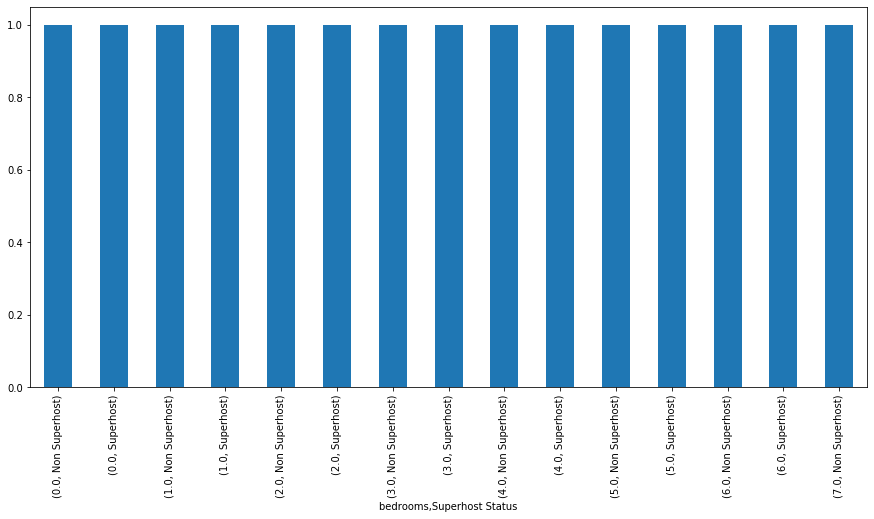

In [17]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
p.groupby(['bedrooms','Superhost Status']).count()['Price ($)'].plot(ax=ax, kind = 'bar')